Reinforcement Learning Exam

- Year: 2024-2025
- Instructor: Richard Combes
- Email: richard.combes@centralesupelec.fr
- Deadline: 28th febuary at 23h59 (Paris time)


Instructions:
- the exam is to be done by groups of 2 students
- complete this notebook with your answers
- your answers will include both the python code as well as figures and explanations in text
- when you are done, send this notebook by email to the instructor
- to avoid confusion use the following naming convention for your notebook file: "(name of first student)(name of second student).ipynb"
- any exam received after the deadline will not be considered

Introduction and Model

The goal of this exam is to learn how to drive a car up a hill using reinforcement learning. To do so we will consider the following model.

We assume that the car is modelled by a point, located at location $(x,z)$ where $x$ and $z$ denote the coordinates of the car on the $x$ axis and the $z$ axis respectively. The car is located on a hill, so that $z = h(x)$ where $h(x)$ denotes the height of the hill at location $x$ given by
$$
h(x) = {1 \over 2} x^2
$$

Location $(x,z) = (0,0)$ is the bottom of the hill, and location $x=(1,{1 \over 2})$ is the top of the hill. 

The goal is for the driver of the car to get the car to the top of the hill as fast as possible, and we assume that once the top of the hill has been reached the experiment stops. An illustration is found below, where the car is represented as a red dot and the target is represented as a green dot.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


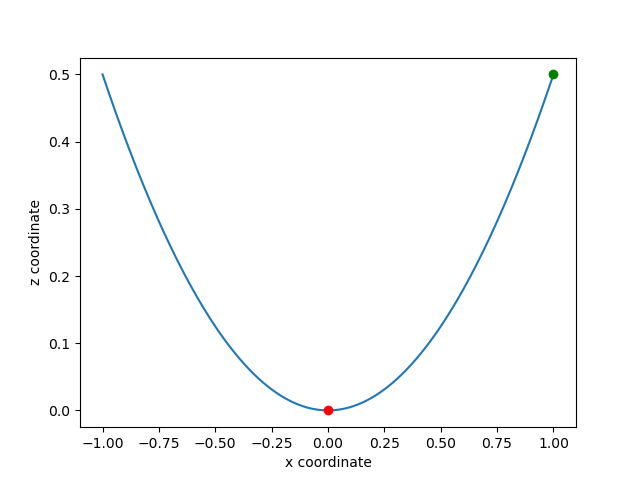

In [2]:
deltax = 0.01
x_vector = np.arange(-1,1+deltax,deltax)
z_vector = 0.5*(x_vector) ** 2
x_0 = 0
z_0 = 0
plt.plot(x_vector, z_vector)
plt.plot(x_0, z_0,'ro')
plt.plot(1, 0.5,'go')
plt.xlabel('x coordinate')
plt.ylabel('z coordinate')
plt.show()

Control Strategy

To control the car, the driver acts on the engine and its action is modelled by $w \in \{-1,0,1\}$ where $w=0$ means that the engine is inactive, $w=1$ means that the driver is accelerating the car forward as hard as possible, and $w=-1$ means that the driver is accelerating the car backwards as hard as possible.

The trajectory of the car is determined by Newton's law which is the second order differential equation:
$$
    m {d^2  x \over d t^2}(t) =  {1 \over \sqrt{1 + (h'(x(t)))^2}} \Big[ -g m {h'(x(t)) \over \sqrt{1 + (h'(x(t)))^2}} + K m w(t)\Big]
$$
with $x(t)$ the location of the car at time $t$, $w(t)$ the action of the driver at time $t$, $m$ the mass of the car, $g$ the gravitational constant and $K$ proportional to the maximal torque of the engine.

We assume that the car starts at the bottom of the hill from a dead stop, so that 
$$
\Big(x(0),{d  x \over d t}(0)\Big)  = (0,0)
$$

The differential equation simplifies to:
$$
    {d^2  x \over d t^2}(t) =  - {g x(t) \over 1 + x(t)^2} +  {K w(t) \over \sqrt{1 + x(t)^2}}
$$
and we assume that $g=10$ and $K=1$ throughout.




Casting the problem as a Markov Decision Process

In order to fit the framework seen in class, we consider a discretized time version that can be written as a Markov Decision Process. The state of the system at time instants $k=0,1,...$ is given by its position and speed at time instants $t = k \Delta$ for $k$ integer:
$$
s_k = \Big(s_{k,0},s_{k,1}\Big) = \Big( x(k \Delta) , {d x \over d t}(k \Delta) \Big)
$$
where $\Delta$ is a small discretization step. It is noted that the state contains both the position and the speed of the car, which is necessary.

The action at time instant $k$ is given by
$$
a_k = w(k \Delta t) \in \{-1,0,+1\}   
$$
The reward is given by
$$
r_k = 1( |s_{k,0}| \ge 1 )
$$
so that the reward is $1$ if the top of the hill has been reached and $0$ otherwise.

One can readily check that this defines a Markov Decision Process. 

The evolution of the state $s$ given the action $a$ is given by discretizing the differential equation above:
$$
    {s_{k+1,0} - s_{k,0} \over \Delta} =  s_{k,1} \text{     and       } {s_{k+1,1}-s_{k,1} \over \Delta}   =  { g s_{k,0} \over 1 + (s_{k,0})^2 }  +  {K a_k \over \sqrt{1 + (s_{k,0})^2} }
$$

We will consider $\Delta = 0.01$ throughout.

Getting Started

In order to get started you are provided with several pieces of code:
- the "next_state" subroutine takes as input the current state $s_k$ and the current action $a_k$ and outputs the next state $s_{k+1}$
- the "policy1" subroutine is an example of a policy. We recall that a policy takes the current state $s_k$ as an input and outputs the current action $a_k$. Here this policy is a simple policy where $a_k=1$ irrespective of $s_k$, meaning that the driver always accelerates the car forward.
- the "generate_episode" subroutine takes as an input a time horizon $T$ and a policy, and outputs the trajectory of the system $(s_{k})_{k=1,...,T}$.
- the last piece of code generates an animation that represents the trajectory of the system under the policy described above

You can reuse and modify those pieces of code in order to answer the exam questions.

Note: some policies might take a large, possibly infinite, amount of time in order to reach the top of the hill, therefore you should simulate episodes up to a well chosen maximal duration $T_{max}$, in order to avoid infinite loops.


In [3]:
def next_state(s,a):
    delta = 0.01
    g = 10.0
    K = 1.0
    snext = list(s)
    snext[0] = s[0] + s[1]*delta
    snext[1] = s[1] + (-g*s[0]/(1 + (s[0])**2) + K*a/np.sqrt(1 + (s[0])**2))*delta
    return snext

In [4]:
def policy1(s):
    a = 1
    return a

In [5]:
def generate_episode(T,policy):
    s_t = []
    s = [0.0,0.0]
    for t in range(T):
        s_t.append(list(s))
        a = policy(s)
        s = next_state(s,a)
    return s_t

<IPython.core.display.Javascript object>


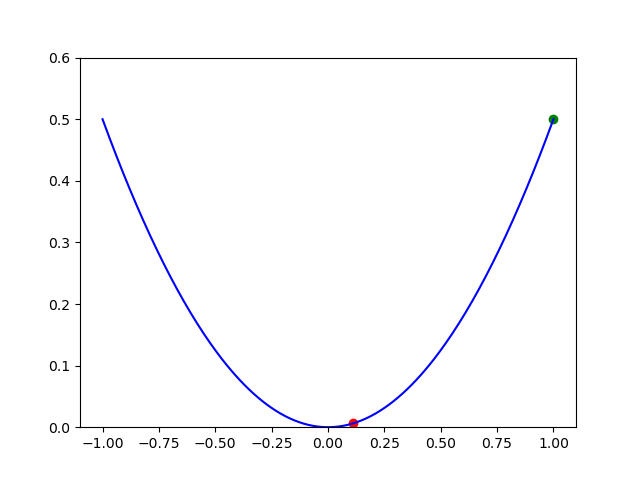

In [6]:
T = 1000
s_t = generate_episode(T,policy1)
fig, ax = plt.subplots()
line, = plt.plot(-1, 1,'ro')
line1, = plt.plot(1, 0.5,'go')
line2, = plt.plot(x_vector, z_vector,'b')
ax.set_xlim(-1.1,1.1)
ax.set_ylim(0, 0.6)
def animate(t):
    s = s_t[t]
    line.set_data((s[0],0.5*s[0]**2))
    return line
anim = FuncAnimation(fig, animate, frames=(T-1), interval=20)
plt.show()

Question 1. Observe and comment the result of the simple policy described above where $a_k=1$ for all $k$. What is the amount of time required for the car to reach the top of the hill ? Is this policy optimal, and if not, can you suggest a better policy ?

Question 2. Consider three policies: 
- the policy where $a_k = 1$ when $s_{k,0} \ge 0$, and $a_k = -1$ when $s_{k,0} < 0$ 
- the policy where $a_k$ is i.i.d. uniformly distributed in $\{-1,0,1\}$
- the policy where $a_k = 1$ when $s_{k,0} \ge 0$, and $a_k = 0$ when $s_{k,0} < 0$ 

For each of those three policies, simulate the trajectory of the system and comment on the time necessary for the time to reach the top of the hill.


Question 3. We would like to compute the optimal policy which gets the car to the top of the hill as quickly as possible. As seen in class, the optimal policy can be found using dynamic programming, by implementing Value Iteration. Do you believe that it is possible in practice to do so for solving the problem at hand ? Justify your answer using precise quantitative arguments.

Question 4. We now wish to find the best policy amongst a relatively small set of simple policies. We consider the set of policies such that $a_k$ solely depends on the signs of the position $s_{k,0}$ and speed $s_{k,0}$, so that
$$
a_k = f( \text{sign}(s_{k,0}),\text{sign}(s_{k,1}))
$$
where $f: \{-1,1\} \to \{-1,0,1\}$. How many such policies are there ? For each of those policies, simulate the trajectory of the system, find the best one, and provide a physical argument why this policy is indeed the best.


Question 5. Based on the question above, we now propose to apply policy gradient to the problem. We consider a set of parameterized policies, parameterized by a two dimensional vector $\theta = (\theta_0,\theta_1)$, where the action probabilities are given as
$$
   \mathbb{P}( a_t = 1| s_t) = \phi( \text{sign}(s_{k,0})\theta_0 + \theta_1 \text{sign}(s_{k,1}))
\text{ and } \mathbb{P}( a_t = -1| s_t) = 1-\phi( \text{sign}(s_{k,0})\theta_0 + \theta_1 \text{sign}(s_{k,1}))
$$
where $\phi$ is the sigmoidal function 
$$
\phi(x) = {1 \over  1+e^{-x}}
$$
Compute the policy gradient estimate, and implement policy gradient descent as seen in class. How many iterations are necessary in order to obtain a good policy ?

Note: you should be careful in how the initial value of $\theta$ and the step size $\eta$ are chosen, as those parameters impact the convergence speed and their values should be found by trial and error. 


Question 6. We now wish to apply policy gradient to another set of parameterized policies, once again parameterized by a two dimensional vector $\theta = (\theta_0,\theta_1)$ where the action probabilities are given as
$$
   \mathbb{P}( a_t = 1| s_t) = \phi( s^\top \theta)
\text{ and } \mathbb{P}( a_t = -1| s_t) = 1-\phi( s^\top \theta)
$$
where $\phi$ is the sigmoidal function 
$$
\phi(x) = {1 \over  1+e^{-x}}
$$
and
$$
s^\top \theta= s_{k,0} \theta_0 + \theta_1 s_{k,1}
$$
which is the dot product between $s$ and $\theta$ (i.e. the policy is linear).

As in the previous question, compute the policy gradient estimate, and implement policy gradient descent as seen in class. How many iterations are necessary in order to obtain a good policy ?


Question 7. We now wish to extend our results to a new model where the car is affected by a random wind. The effect of the wind is a random force so that the equation describing the system is modified as:
$$
{s_{k+1,0} - s_{k,0} \over \Delta} =  s_{k,1} \text{     and       } {s_{k+1,1}-s_{k,1} \over \Delta}   =  { g s_{k,0} \over 1 + (s_{k,0})^2 }  +  {K a_k \over \sqrt{1 + (s_{k,0})^2} } + L e_k
$$
where $e_k$ is i.i.d uniformly distributed in $\{-1,+1\}$ to model the random wind and $L$ is a coefficient describing the strength of the wind. We will consider $L=0.1$ here. Redo questions 4 and 5 for this new model, and comment on whether or not the results change (you should create a new  "next_state" subroutine in order to reflect this new model).